In [1]:
# print messages to terminal
import sys
sys.stdout = open('/dev/stdout', 'w')

In [2]:
from flowpy import Dag
from IPython.display import display
import random
import numpy as np
import theano.tensor as tt

# make some test data
x_ = range(10000)
x = tt.as_tensor_variable(x_)
y = [(50+(x__*3)) + np.random.normal(0,1) for x__ in x_]
y = tt.as_tensor_variable(y)

# create dag with data nodes
dag = Dag(data={'predictor':x,'data':y})

display(dag)

In [4]:
import pymc3
print(dag)

In [40]:
x_ = range(10000)
x = tt.as_tensor_variable(x_)
y = [(50+(x__*3)) + np.random.normal(0,1) for x__ in x_]
y = tt.as_tensor_variable(y)
predictor = x
data = y 
upper = 60
lower = 40
with pymc3.Model() as model:
    var4 = pymc3.Uniform('var4',upper = 5,lower=0)
    var5 = pymc3.math.dot(a = var4,b = predictor)
    var8 = pymc3.Uniform('var8',upper = upper,lower=lower)
    var7 = var5+var8 
    var6 = pymc3.Normal('var6',mu = var7,observed = data)
    approx = pymc3.fit(n=100000, method=pymc3.ADVI(), model=model)
    samples = approx.sample(10000)

Average Loss = 25,534: 100%|██████████| 100000/100000 [00:33<00:00, 2998.00it/s]   
Finished [100%]: Average Loss = 25,564


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9aa15132b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9aa297ae80>]], dtype=object)

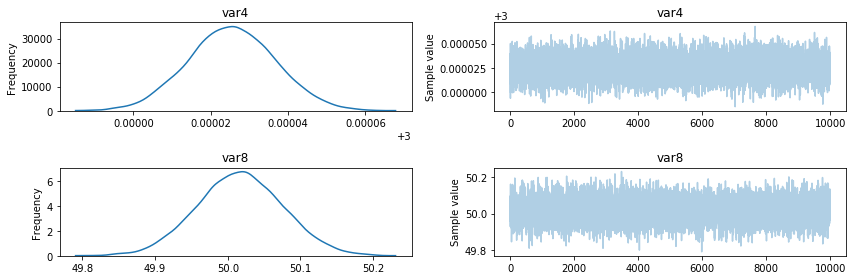

In [41]:
pymc3.traceplot(samples)

In [ ]:
{"3": [-0.45302867315385387, -0.00371282997000436, 0.7822458145201566, 1.681400074364513, -0.14379055695292986, 0.512817953189588], "4": [0.15238492804506074, 0.6031925851565928, -0.32884131729900157, -0.34320250935659213, -0.953271853865743, -0.5970006682491421]}